# Lab 1
# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Set random seed for reproducibility
np.random.seed(42)
# Configure matplotlib
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
print("Libraries loaded successfully!")


Libraries loaded successfully!


# Excercise 1

In [6]:
class MLP:
    """
    Multi-Layer Perceptron with one hidden layer.
    Uses sigmoid activation and backpropagation.
    """
    
    def __init__(self, n_inputs, n_hidden, n_outputs, learning_rate=0.1):
        """
        Initialise the MLP.
        
        Parameters:
        -----------
        n_inputs : int
            Number of input features
        n_hidden : int
            Number of hidden neurons
        n_outputs : int
            Number of output neurons
        learning_rate : float
            Learning rate for weight updates
        """
        self.learning_rate = learning_rate
        # Input to hidden layer weights (weights_ih) and biases (bias_h)
        self.weights_ih = np.random.uniform(-0.5, 0.5, (n_inputs, n_hidden))
        self.bias_h = np.random.uniform(-0.5, 0.5, n_hidden)
        
        # Hidden to output layer weights (weights_ho) and biases (bias_o)
        # TODO: add code here for weights_ho and bias_o
        ## Hint: see code for weights_ih and bias_h above
        self.weights_ho = np.random.uniform(-0.5, 0.5, (n_hidden, n_outputs))
        self.bias_o = np.random.uniform(-0.5, 0.5, n_outputs)
        
    def sigmoid(self, x):
        """Sigmoid activation function."""
        # TODO: Implement sigmoid
        ## Hint: see Lab 1
        # Clip to avoid overflow in exp
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to avoid overflow
        
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid: σ'(x) = σ(x) * (1 - σ(x))."""
        # TODO: Implement sigmoid derivative
        ## Hint: see Lab 1
        s = self.sigmoid(x)
        return s * (1 - s)
        
    def forward(self, X):
        """
        Forward pass through the network.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_inputs)
            Input data
        
        Returns:
        --------
        array : Output activations
        """
        # TODO: code this entire method
        ## Hint: see Lab 1
        # Input to hidden layer
        self.z_h = np.dot(X, self.weights_ih) + self.bias_h
        self.a_h = self.sigmoid(self.z_h)
        
        # Hidden to output layer
        self.z_o = np.dot(self.a_h, self.weights_ho) + self.bias_o
        self.a_o = self.sigmoid(self.z_o)
        
        return self.a_o
        
    def backward(self, X, y):
        """
        Backward pass (backpropagation).
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_inputs)
            Input data
        y : array-like, shape (n_samples, n_outputs)
            Target outputs
        """
        # TODO: code this entire method
        ## Hint: see Lab 1
        m = X.shape[0]  # Number of samples
        
        # Output layer error and gradient
        output_error = y - self.a_o
        output_delta = output_error * self.sigmoid_derivative(self.z_o)
        
        # Hidden layer error and gradient
        hidden_error = np.dot(output_delta, self.weights_ho.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.z_h)
        
        # Update weights and biases using gradient descent
        self.weights_ho += self.learning_rate * np.dot(self.a_h.T, output_delta) / m
        self.bias_o += self.learning_rate * np.mean(output_delta, axis=0)
        
        self.weights_ih += self.learning_rate * np.dot(X.T, hidden_delta) / m
        self.bias_h += self.learning_rate * np.mean(hidden_delta, axis=0)
        
    def train(self, X, y, epochs, verbose=True):
        """
        Train the network.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_inputs)
            Training inputs
        y : array-like, shape (n_samples, n_outputs)
            Training targets
        epochs : int
            Number of training epochs
        verbose : bool
            Print progress if True
        
        Returns:
        --------
        list : Training loss history
        """
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Compute loss (Mean Squared Error)
            loss = np.mean((y - output) ** 2)
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y)
            
            if verbose and (epoch % 100 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch}: Loss = {loss:.6f}")
        
        return losses
    
    def predict(self, X):
        """
        Make predictions.
        
        Returns the class with highest output activation.
        """
        output = self.forward(X)
        return np.argmax(output, axis=1)
print("MLP class defined successfully!")

MLP class defined successfully!


# Excercise 2

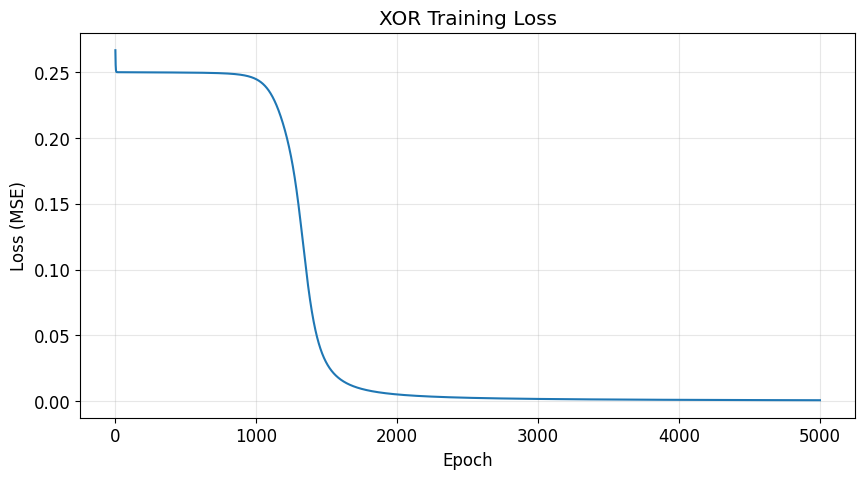


XOR Predictions:
--------------------------------------------------
Input: [0 0] -> Output: 0.0251 -> Rounded: 0 (Expected: 0) ✓
Input: [0 1] -> Output: 0.9708 -> Rounded: 1 (Expected: 1) ✓
Input: [1 0] -> Output: 0.9770 -> Rounded: 1 (Expected: 1) ✓
Input: [1 1] -> Output: 0.0241 -> Rounded: 0 (Expected: 0) ✓


In [7]:
# Define XOR data
# TODO: add code here to define XOR data
## Hint: see Lab 1
# Create and train MLP
# Define training data for XOR
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_xor = np.array([[0], [1], [1], [0]])

np.random.seed(42)
mlp_xor = MLP(n_inputs=2, n_hidden=4, n_outputs=1, learning_rate=2.0)
losses_xor = mlp_xor.train(X_xor, y_xor, epochs=5000, verbose=False)
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses_xor)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('XOR Training Loss')
plt.grid(True, alpha=0.3)
plt.show()
# Test predictions
print("\nXOR Predictions:")
print("-" * 50)
for i in range(len(X_xor)):
    output = mlp_xor.forward(X_xor[i:i+1])
    rounded = round(output[0][0])
    correct = "✓" if rounded == y_xor[i][0] else "✗"
    print(f"Input: {X_xor[i]} -> Output: {output[0][0]:.4f} -> Rounded: {rounded} (Expected: {y_xor[i][0]}) {correct}")

# Excercise 3
## Task 3.1

In [8]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
print("Iris Dataset Overview")
print("=" * 50)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print(f"\nClass distribution: {np.bincount(y)}")

Iris Dataset Overview
Features shape: (150, 4)
Target shape: (150,)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

Class distribution: [50 50 50]


## Task 3.2

In [9]:
# Normalise features to [0, 1]
scaler = MinMaxScaler()
X_normalised = scaler.fit_transform(X)
print("Data Normalisation")
print("=" * 50)
print("Before normalisation:")
print(f" Min: {X.min(axis=0)}")
print(f" Max: {X.max(axis=0)}")
print("\nAfter normalisation:")
print(f" Min: {X_normalised.min(axis=0)}")
print(f" Max: {X_normalised.max(axis=0)}")


Data Normalisation
Before normalisation:
 Min: [4.3 2.  1.  0.1]
 Max: [7.9 4.4 6.9 2.5]

After normalisation:
 Min: [0. 0. 0. 0.]
 Max: [1. 1. 1. 1.]


## Task 3.3

In [10]:
# One-hot encode targets
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
print("One-Hot Encoding")
print("=" * 50)
print(f"Original y[:5]: {y[:5]}")
print(f"\nOne-hot y[:5]:")
print(y_onehot[:5])
print(f"\nEncoding: 0 → [1,0,0], 1 → [0,1,0], 2 → [0,0,1]")


One-Hot Encoding
Original y[:5]: [0 0 0 0 0]

One-hot y[:5]:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

Encoding: 0 → [1,0,0], 1 → [0,1,0], 2 → [0,0,1]


## Task 3.4

In [11]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
 X_normalised, y_onehot, test_size=0.2, random_state=42, stratify=y
)
# Also keep original labels for evaluation
_, _, y_train_labels, y_test_labels = train_test_split(
 X_normalised, y, test_size=0.2, random_state=42, stratify=y
)
print("Train/Test Split")
print("=" * 50)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Train/Test Split
Training set: 120 samples
Test set: 30 samples


# Excercise 4
## Task 4.1

In [12]:
np.random.seed(42)
# Create MLP: 4 inputs, 8 hidden, 3 outputs, learning rate = 0.5
# TODO: add code here to create MLP
## Hint: see Exercise 2
mlp_iris = MLP(n_inputs=4, n_hidden=8, n_outputs=3, learning_rate=0.5)
print("Training MLP on Iris dataset...")
print("=" * 50)
# Train
losses_iris = mlp_iris.train(X_train, y_train, epochs=1000, verbose=True)


Training MLP on Iris dataset...
Epoch 0: Loss = 0.245520
Epoch 100: Loss = 0.212343
Epoch 200: Loss = 0.192939
Epoch 300: Loss = 0.160408
Epoch 400: Loss = 0.134717
Epoch 500: Loss = 0.121064
Epoch 600: Loss = 0.113445
Epoch 700: Loss = 0.108393
Epoch 800: Loss = 0.104507
Epoch 900: Loss = 0.101203
Epoch 999: Loss = 0.098243


## Task 4.2

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(losses_iris)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Iris Classification - Training Loss')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('iris_training_loss.png', dpi=150)
plt.show()
print("Figure saved as 'iris_training_loss.png'")
